In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
cars_prices = pd.read_csv("C:\\Users\\jyoth\\OneDrive\\Desktop\\Internshala\\Mechademy\\cars_price.csv", index_col="S.No.")
cars_prices.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
S.No.,,,,,,,,,,,,
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
cars_prices.shape

(40000, 12)

In [5]:
cars_prices.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [6]:
cars_prices.isna().sum()/cars_prices.shape[0]

make                   0.000000
model                  0.000000
priceUSD               0.000000
year                   0.000000
condition              0.000000
mileage(kilometers)    0.000000
fuel_type              0.000000
volume(cm3)            0.000750
color                  0.000000
transmission           0.000000
drive_unit             0.033625
segment                0.093875
dtype: float64

In [7]:
cars_prices.dropna(inplace=True)

In [8]:
cars_prices.shape

(35016, 12)

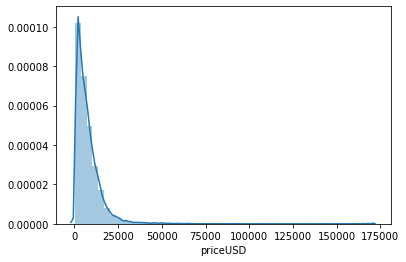

In [9]:
sns.distplot(cars_prices.priceUSD)

In [10]:
len(cars_prices["mileage(kilometers)"][cars_prices["mileage(kilometers)"]==cars_prices["mileage(kilometers)"].max()])

13

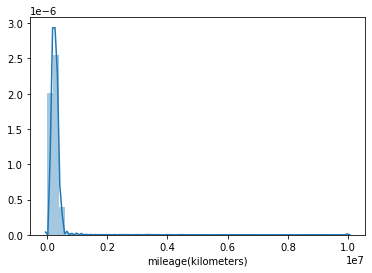

In [11]:
sns.distplot(cars_prices["mileage(kilometers)"])

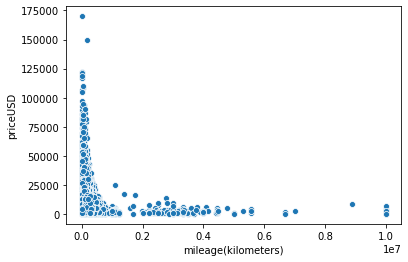

In [12]:
sns.scatterplot(data=cars_prices, x='mileage(kilometers)', y='priceUSD')

In [13]:
cars_prices.corr()

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.643067,-0.179098,0.268773
year,0.643067,1.000000,-0.245647,0.028499
mileage(kilometers),-0.179098,-0.245647,1.000000,0.019253
volume(cm3),0.268773,0.028499,0.019253,1.000000


In [14]:
#Range of Mileage values
print("Max: ", cars_prices['mileage(kilometers)'].max())
print("Min: ", cars_prices['mileage(kilometers)'].min())

Max:  9999999.0
Min:  0.0


In [15]:
cars_prices[cars_prices['mileage(kilometers)']<50].shape

(327, 12)

In [16]:
#Range of Volume values
print("Max: ", cars_prices["volume(cm3)"].max())
print("Min: ", cars_prices["volume(cm3)"].min())

Max:  20000.0
Min:  500.0


In [17]:
cars_prices[cars_prices['volume(cm3)']<3000].shape

(30914, 12)

Using domain knowledge, the values of Mileage and Volume are absurd. Hence, the dataset was subsetted to only accomodate records that have normal values.

### Subset of dataset with sane values

In [19]:
mil = cars_prices[(cars_prices['mileage(kilometers)']<50) & (cars_prices['volume(cm3)']<5000)]

In [20]:
mil.shape

(322, 12)

In [21]:
mil.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
S.No.,,,,,,,,,,,,
229,opel,zafira,4450,2002,with mileage,0.0,diesel,2000.0,black,mechanics,front-wheel drive,M
342,volkswagen,golf,238,1987,for parts,1.0,petrol,1600.0,white,mechanics,front-wheel drive,C
402,renault,laguna,800,1995,with mileage,0.0,petrol,1800.0,gray,mechanics,front-wheel drive,D
766,bmw,6-seriya,78649,2019,with mileage,10.0,diesel,2993.0,black,auto,all-wheel drive,S
822,mitsubishi,space-wagon,500,1992,for parts,0.0,diesel,1800.0,burgundy,mechanics,front-wheel drive,M


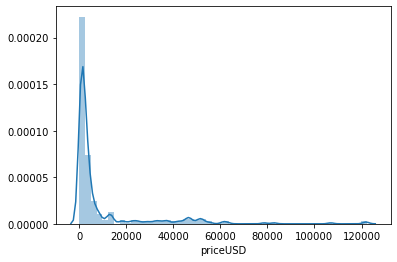

In [166]:
sns.distplot(mil.priceUSD)